In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define x range
x = np.linspace(-5, 5, 1000)

# 1. ReLU (Rectified Linear Unit)
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 2. Mish
def softplus(x):
    return np.log(1 + np.exp(np.clip(x, -500, 500)))  # clip to avoid overflow

def mish(x):
    return x * np.tanh(softplus(x))

def mish_derivative(x):
    """
    f'(x) = e^x * omega / delta^2
    where omega = e^(3x) + 4*e^(2x) + e^x*(6+4x) + 4*(1+x)
    and delta = (e^x + 1)^2 + 1
    """
    ex = np.exp(np.clip(x, -500, 500))  # clip to avoid overflow
    omega = np.exp(np.clip(3*x, -500, 500)) + 4*np.exp(np.clip(2*x, -500, 500)) + ex*(6 + 4*x) + 4*(1 + x)
    delta = (ex + 1)**2 + 1
    return ex * omega / (delta**2)

# 3. ELU (Exponential Linear Unit)
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(np.clip(x, -500, 500)) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(np.clip(x, -500, 500)))

# 4. Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(np.clip(-x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# 5. Tanh (Hyperbolic Tangent)
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    t = np.tanh(x)
    return 1 - t**2

# 6. Softplus
def softplus_func(x):
    return np.log(1 + np.exp(np.clip(x, -500, 500)))

def softplus_derivative(x):
    return sigmoid(x)  # derivative of softplus is sigmoid

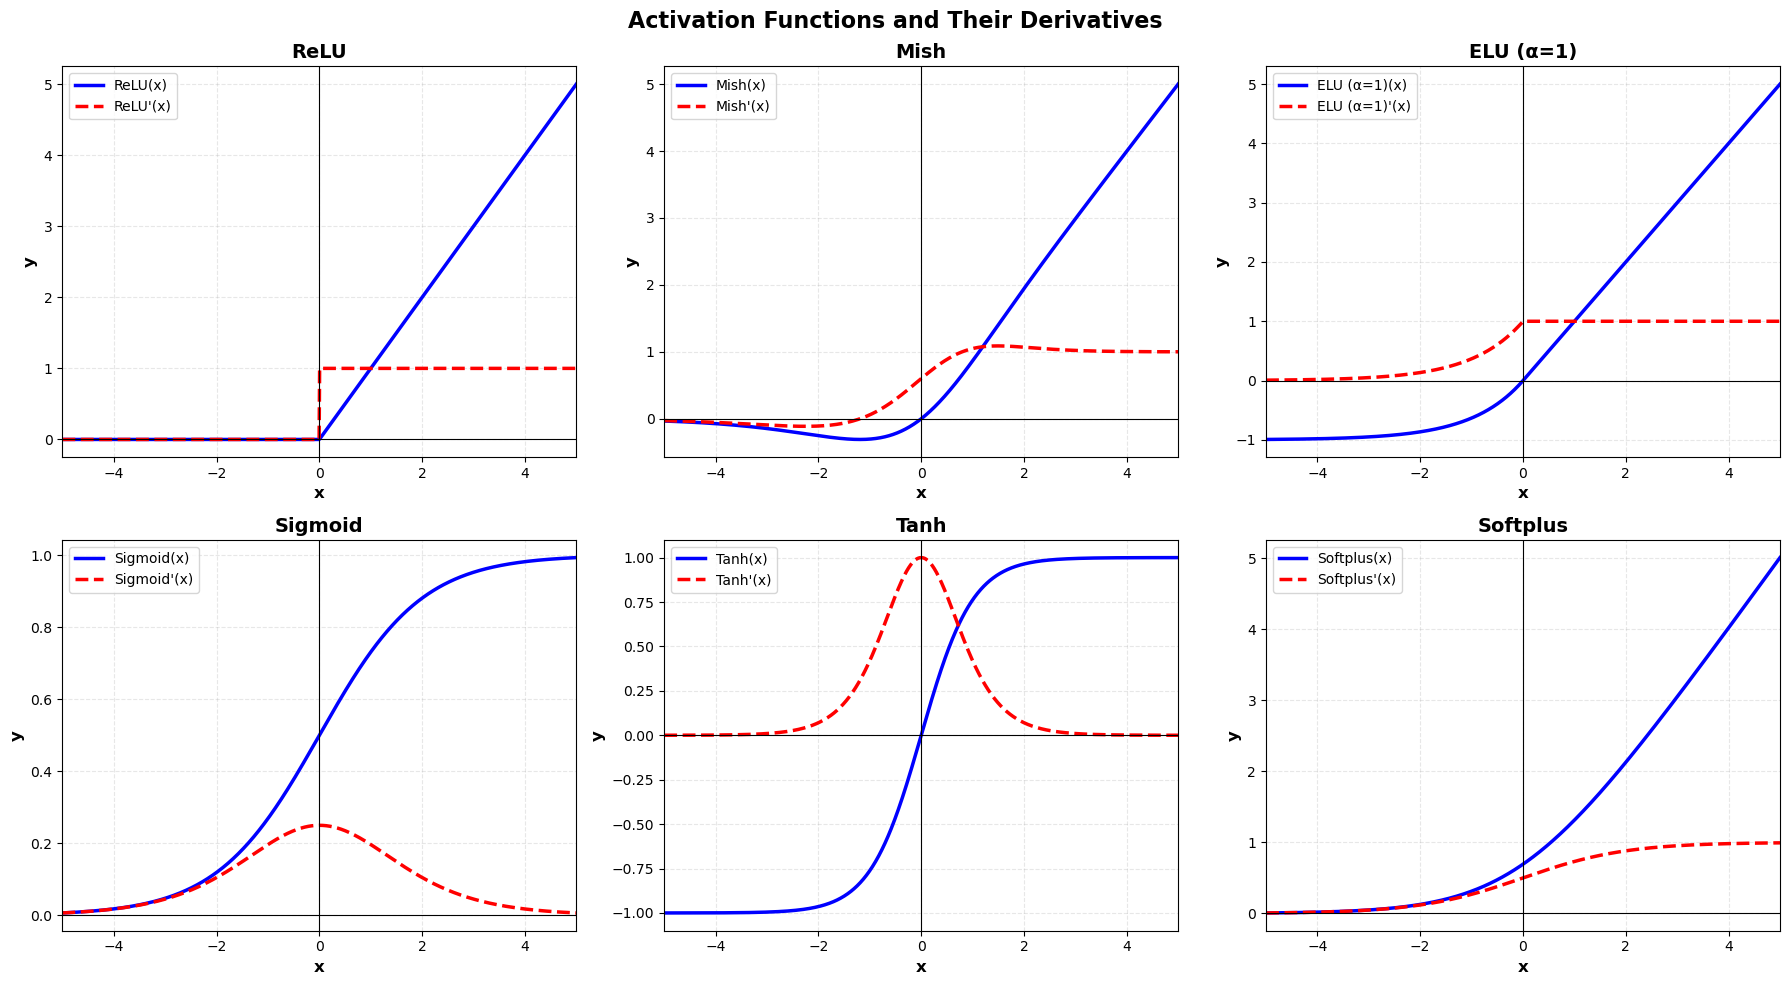

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Activation Functions and Their Derivatives', fontsize=16, fontweight='bold')

# List of activation functions
activations = [
    ('ReLU', relu, relu_derivative, axes[0, 0]),
    ('Mish', mish, mish_derivative, axes[0, 1]),
    ('ELU (α=1)', lambda x: elu(x, alpha=1.0), lambda x: elu_derivative(x, alpha=1.0), axes[0, 2]),
    ('Sigmoid', sigmoid, sigmoid_derivative, axes[1, 0]),
    ('Tanh', tanh, tanh_derivative, axes[1, 1]),
    ('Softplus', softplus_func, softplus_derivative, axes[1, 2])
]

# Plot each activation function
for name, func, deriv, ax in activations:
    # Compute function and derivative values
    y = func(x)
    y_prime = deriv(x)
    
    # Plot
    ax.plot(x, y, 'b-', linewidth=2.5, label=f'{name}(x)')
    ax.plot(x, y_prime, 'r--', linewidth=2.5, label=f"{name}'(x)")
    
    # Grid and labels
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.axhline(y=0, color='k', linewidth=0.8)
    ax.axvline(x=0, color='k', linewidth=0.8)
    ax.set_xlabel('x', fontsize=12, fontweight='bold')
    ax.set_ylabel('y', fontsize=12, fontweight='bold')
    ax.set_title(name, fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.set_xlim([-5, 5])

plt.tight_layout()
plt.show()